## Analysis for instagram page Dataset
- In this project, I will work on instagram page which has some page properities

### instagram page Dataset Field Description
---
- Below is a description of column fields in the Dataset:
---
#### Core Fileds
  - **Impressions** → Total post views  
  - **From Home** → Views from Home Feed  
  - **From Hashtags** → Views from Hashtags  
  - **From Explore** → Views from Explore tab  
  - **From Other** → Views from other sources  
  - **Saves** → Number of saves  
  - **Comments** → Number of comments  
  - **Shares** → Number of shares  
  - **Likes** → Number of likes  
  - **Profile Visits** → Profile visits generated from the post  
  - **Follows** → New followers gained from the post  
  - **Caption** → Post caption text  
  - **Hashtags** → Hashtags used in the post 

#### Questions to be Answered depending on the Analysis
1. What is the top source of my impressions?  
2. Does sharing increase the number of followers?  
3. Does sharing increase Impressions?  
4. Does using more hashtags increase impressions?  
5. Does using more captions increase impressions?  
6. what is the relationship between Impressios,Likes,Shares and profile visit? 
7. Does an increase in profile visits and Impressions lead to more followers?  

In [19]:
# Load needed Modules
import pandas as pd

In [20]:
# display all data Columns 
pd.options.display.max_columns = None

### Data Wrangling 
- Data Assessinbg by printing the first five Rows 

In [66]:
# load the dataset into dataframe
df = pd.read_csv("Instagram data1.csv")

In [67]:
#display the first two rows
df.head(2)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...


In [68]:
# check for dataset shape
df.shape

(119, 13)

- we found that the data set has 119 post (row) with 13 feature (column)

In [69]:
# check for data info (quality)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [70]:
# List all data columns
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

### Feature Enginnering
- add total engagment column total(likes + comments + shares)
- add Engagment Rate column (total engagment / impressions)
- add profile visit rate (Profile Visits / Impressions)
- add Follow Rate  (Follows / Profile Visits)
- add Hashtag Count that has anumber of hashtags used in the post
- add Not Follow column (profile visit - follow)
- add number of caption column

In [71]:
# copy the dataframe
df_copy = df.copy()

In [72]:
# check for Duplicates
df.duplicated().sum()

np.int64(17)

- there is only 17 duplicated rows

In [73]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [74]:
# check for Duplicates
df.duplicated().sum()

np.int64(0)

In [75]:
# check for null values
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

- there is zero null values

In [132]:
# Add the new columns 
df['Total Engagment'] = df['Likes'] + df['Comments'] + df['Shares']
df['Engagment Rate'] = df['Total Engagment'] / df['Impressions']
df['profile visit rate'] = df['Profile Visits'] / df['Impressions']
df['Follow Rate'] = df['Follows'] / df['Profile Visits']
df['Not Follow'] = df['Profile Visits'] - df['Follows']
df['num_captions'] = df['Caption'].apply(lambda x : len(x))

In [79]:
#add Hashtag Count that has anumber of hashtags used in the post
df['Hashtags']=df['Hashtags'].str.split('#')

In [80]:
df['num_hashtags']=df['Hashtags'].str.len()

In [82]:
df['num_hashtags'].reset_index(drop=True,inplace=True)

In [133]:
#display the first two rows with the new columns
df.head(2)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,Total Engagment,Engagment Rate,profile visit rate,Follow Rate,num_hashtags,Not Follow,num_captions
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,"[, finance , money , business , investing , in...",176,0.044898,0.008929,0.057143,23,33,112
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,"[, healthcare , health , covid , data , datasc...",245,0.045421,0.008899,0.208333,19,38,187


In [86]:
# Load needed Modules
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

### Q1. What is the top source of my impressions?

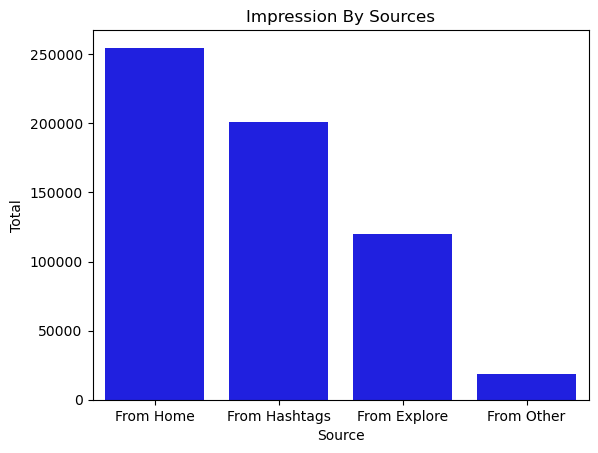

In [116]:
impression_sources = df[["From Home", "From Hashtags", "From Explore", "From Other"]].sum()
sns.barplot(x=impression_sources.index,y=impression_sources.values,color='blue')
plt.title('Impression By Sources')
plt.xlabel('Source')
plt.ylabel('Total')
plt.show()

#### We found that the most Impression gets from home
-----------
### Q2. Does sharing increase the number of followers?

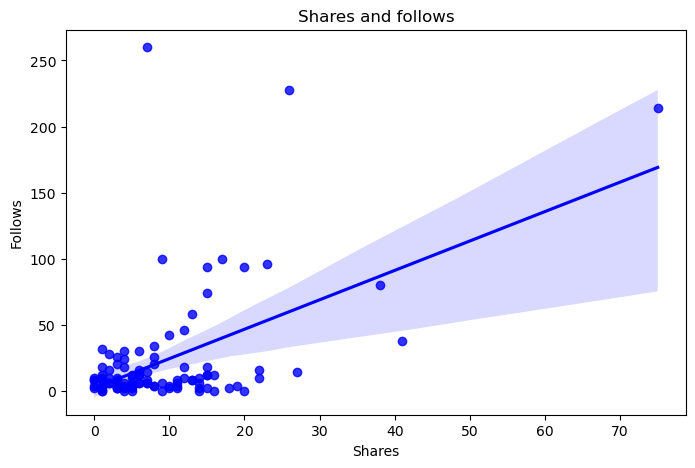

In [112]:
plt.figure(figsize=(8,5))
sns.regplot(data=df,x='Shares',y='Follows',color='blue')
plt.title('Shares and follows')
plt.xlabel('Shares')
plt.ylabel('Follows')
plt.show()

#### this chart shows that the more shares gets more followers.

### Q3.Does sharing increase Impressions?

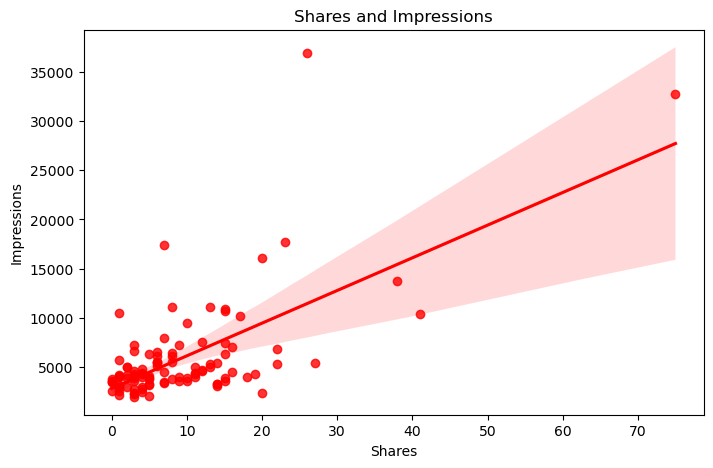

In [118]:
plt.figure(figsize=(8,5))
sns.regplot(data=df,x='Shares',y='Impressions',color='red')
plt.title('Shares and Impressions')
plt.xlabel('Shares')
plt.ylabel('Impressions')
plt.show()

#### this chart shows that the more shares gets more Impressions, And that mean we should focus on increasing the number of shares

### Q4.Does using more hashtags increase impressions?

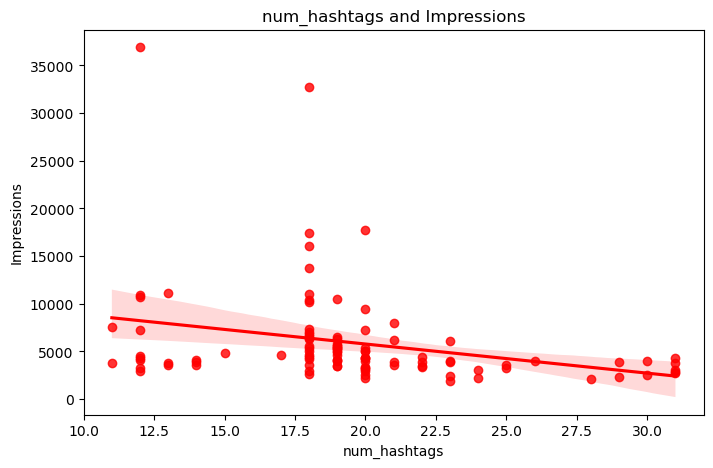

In [125]:
plt.figure(figsize=(8,5))
sns.regplot(data=df,x='num_hashtags',y='Impressions',color='red')
plt.title('num_hashtags and Impressions')
plt.xlabel('num_hashtags')
plt.ylabel('Impressions')
plt.show()

#### this chart shows that increasing the number of hashtags does not lead to an increase in Impressions 

### Q5.Does using more captions increase impressions?

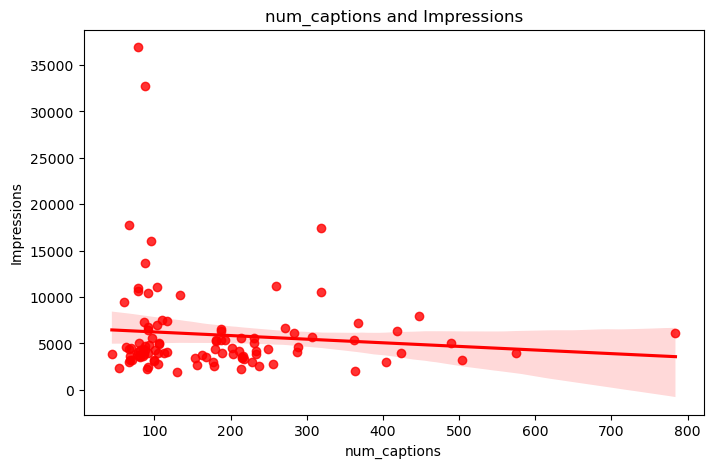

In [137]:
plt.figure(figsize=(8,5))
sns.regplot(data=df,x='num_captions',y='Impressions',color='red')
plt.title('num_captions and Impressions')
plt.xlabel('num_captions')
plt.ylabel('Impressions')
plt.show()

#### this chart shows that increasing the number of captions does not lead to an increase in Impressions 

### Q6.what is the relationship between Impressions,Likes,Shares and profile visit? 

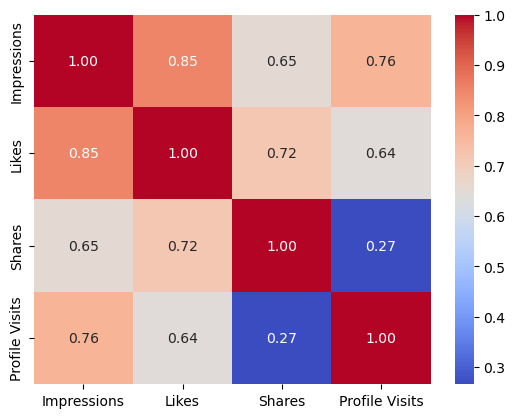

In [142]:
cols_to_check = ['Impressions','Likes','Shares','Profile Visits']
sns.heatmap(df[cols_to_check].corr(),annot=True,cmap='coolwarm',fmt='0.2f')
plt.show()

##### this chart shows that the realtionship between profile visit and shares is Low 
##### and the realtionship between profile visit and Likes is meduim
##### and the realtionship between profile visit and Impressions is high 

### Q7.Does an increase in profile visits and Impressions lead to more followers?

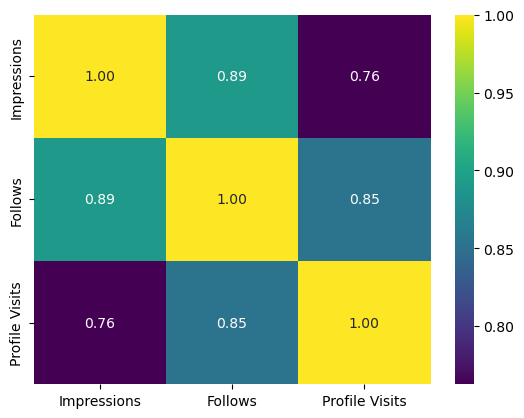

In [144]:
cols_to_check2 = ['Impressions','Follows','Profile Visits']
sns.heatmap(df[cols_to_check2].corr(),annot=True,cmap='viridis',fmt='0.2f')
plt.show()

### this chart shows that Profile visit and Impressions lead to more followers 

## Conclusions
- we found that the most Impression gets from home
- the more shares gets more followers, And that mean we should focus on increasing the number of shares
- the more shares gets more Impressions
- we found that increasing the number of hashtags does not lead to an increase in Impressions, and hashtags that has more Impressions is between (18,21)
- we found that increasing the number of captions does not lead to an increase in Impressions
- we found that the realtionship between profile visit and shares is Low and the realtionship between profile visit and Likes is meduim and the realtionship between profile visit and Impressions is high
- we found that Profile visit and Impressions lead to more followers

## Recommendations
- try to focus on Impressions that come from home
- Because more shares bring more followers, focus on creating content that people want to share
- As shares also increase impressions try to do something to encourage more sharing
- Use around 18–21 hashtags that are relevant, since adding too many does not improve impressions
- Don’t write any longer captions instead, write short captions that invite interaction
- Since profile visits have a low realtionship with shares, don’t depend only on shares
- Because profile visits have a medium realtionship with likes and a high realtionship with impressions, try to improve impressions and likes together to increase visits
- Since profile visits and impressions lead to more followers, make sure your profile encourages visitors to follow you.